In [2]:
import cftime
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import scipy.io as sio
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.util as util
import xarray as xr
import cmocean
import numpy as np
import matplotlib.path as mpath
import pandas as pd
plt.rc('font',family='Arial')

def AlbersMap(limits=[-79, 19, 36, 79],cent_lon=-30,cent_lat=57.5,stand_par=(50,65)):
     #[left, right, bottom, top]
    
    proj = ccrs.AlbersEqualArea(central_longitude=cent_lon,
                                central_latitude=cent_lat,
                                standard_parallels=stand_par)
    
    ax = plt.axes(projection=proj) 
    
    ax.set_extent(limits, crs=ccrs.PlateCarree())
    
    vertices = [(lon, limits[2]) for lon in range(limits[0], limits[1], 1)] + \
               [(lon, limits[3]) for lon in range(limits[1], limits[0], -1)]
    
    boundary = mpath.Path(vertices)
    ax.set_boundary(boundary, transform=ccrs.PlateCarree())

    return ax

def prep4plot(tlat,tlon,X):
    tlon = np.where(np.greater_equal(tlon,min(tlon[:,0])),tlon-360,tlon)

    tlon = np.concatenate((tlon,tlon+360),1)
    tlat = np.concatenate((tlat,tlat),1)
    X = np.concatenate((X,X),1)

    tlon = tlon-360.

    return tlat,tlon,X

In [4]:
ds = xr.open_mfdataset('/Users/Sean/Documents/MATLAB/FG_ANT_RCP45.nc')
ds.mean()

<xarray.Dataset>
Dimensions:                        (member: 9, nlat: 384, nlon: 320, year: 75)
Coordinates:
    ULONG                          (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    ULAT                           (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    TLONG                          (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    TLAT                           (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
  * year                           (year) int64 2006 2007 2008 ... 2079 2080
Dimensions without coordinates: member, nlat, nlon
Data variables:
    __xarray_dataarray_variable__  (member, year, nlat, nlon) float64 dask.array<shape=(9, 75, 384, 320), chunksize=(9, 75, 384, 320)>

In [13]:
grid = ds['__xarray_dataarray_variable__'].sel(year=2080)-ds['__xarray_dataarray_variable__'].sel(year=2006)
grid = grid.mean(dim='member')
tlat,tlon,grid = prep4plot(ds['TLAT'],ds['TLONG'],grid)
grid.shape

(384, 640)

In [ ]:
minvalue_conc = -2
maxvalue_conc = 2

nsteps = 20
cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

fig_dpi = 300
coast_color = '0.5'
bg_color = '0.2'


fig = plt.figure(dpi=fig_dpi)

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,cbarstep)

proj = ccrs.Robinson()
ax = plt.axes(projection=proj) 


conc = ax.contourf(tlon,tlat,grid,
              transform=ccrs.PlateCarree(),
              cmap=cmocean.cm.balance,
              levels=contour_levs,
              extend='both')



cbar1 = fig.colorbar(conc, ticks=contour_labels)
# cbar2 = fig.colorbar(strm.lines)
# cb.set_label(label=r'mmol C m^{-3}',fontsize=20)

# gl = ax.gridlines(linewidth=0.5,linestyle='dotted')

# gl.xlocator=mticker.FixedLocator(np.arange(50,-100,-10))
# gl.ylocator=mticker.FixedLocator(np.arange(35,95,10))

ax.set_facecolor(color=bg_color)

ax.coastlines(resolution='110m',linewidth=0.5,color = '0.5')

In [26]:
fg_ant = sio.loadmat('/Users/Sean/Documents/MATLAB/FG_ANT_CO2.mat')
fg_ant = np.transpose(fg_ant['FG_ANT_CO2'])

In [27]:
fg_ant.shape

(111, 384, 320)

In [28]:
fg_ant = xr.DataArray(fg_ant,dims=['year','nlat','nlon'])
fg_ant['year']=salt_amean.year[-111:]

In [35]:
tlat,tlon,grid = prep4plot(salt_amean['TLAT'],salt_amean['TLONG'],fg_ant.sel(year=1990).values)

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in less
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in greater
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


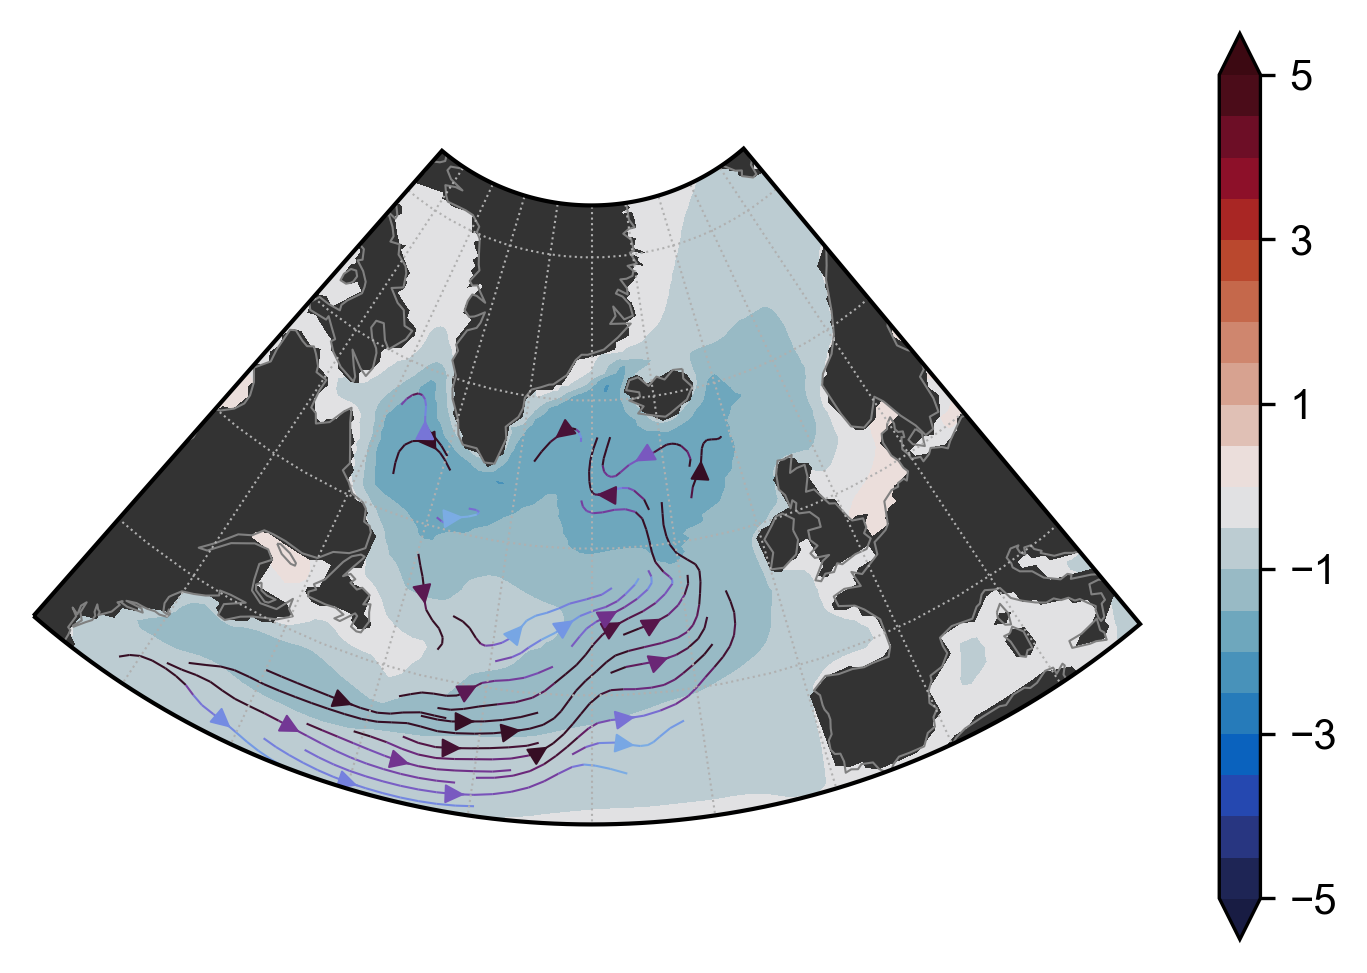

In [37]:
minvalue_conc = -5
maxvalue_conc = 5

nsteps = 20
cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

fig_dpi = 300
coast_color = '0.5'
bg_color = '0.2'


fig = plt.figure(dpi=fig_dpi)

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,cbarstep)

ax = AlbersMap(limits=[-79, 19, 36, 79],cent_lon=-30,cent_lat=57.5,stand_par=(50,65))

conc = ax.contourf(tlon[:,250:450],tlat[:,250:450],-grid[:,250:450],
              transform=ccrs.PlateCarree(),
              cmap=cmocean.cm.balance,
              levels=contour_levs,
              extend='both')

minvalue_vel = 0
maxvalue_vel = 0.05

strm = ax.streamplot(ds_u.ULONG.values, ds_u.ULAT.values, u.where(magnitude > 0.01).values, v.where(magnitude > 0.01).values,
              transform=ccrs.PlateCarree(),
              linewidth=0.5,
              density=2, 
              color=magnitude.values,
              cmap=cmocean.cm.dense,
              norm=colors.Normalize(vmin=minvalue_vel, vmax=maxvalue_vel))

cbar1 = fig.colorbar(conc, ticks=contour_labels)

gl = ax.gridlines(linewidth=0.5,linestyle='dotted')

gl.xlocator=mticker.FixedLocator(np.arange(50,-100,-10))
gl.ylocator=mticker.FixedLocator(np.arange(35,95,10))

ax.set_facecolor(color=bg_color)

ax.coastlines(resolution='110m',linewidth=0.5,color = '0.5')